# 1. Imports Tools

In [11]:
import pandas as pd 
import numpy as np 


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

import matplotlib.pyplot as plt

# 2. Load Mall Customer Dataset

In [12]:
df = pd.read_csv("data.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Data Preprocessing

In [13]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.drop(columns=['CustomerID'],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# 4. Apply KMeans

#### 4.1 Elbo Method

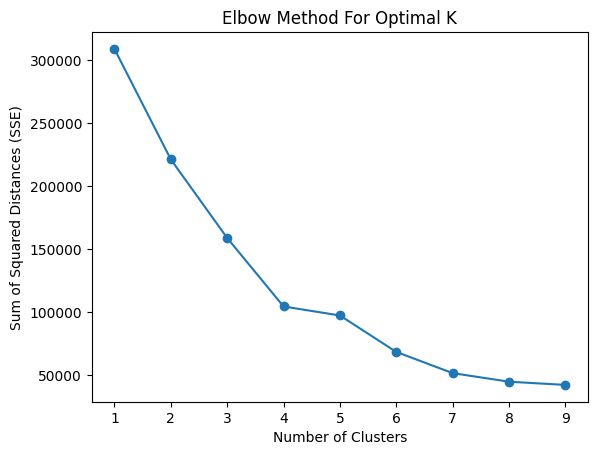

In [14]:
sse = []
k_range = range(1,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    
# Plot the elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

# 4.2 Apply K means with 3 cluster

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)

df['cluster'] = kmeans.fit_predict(df)

# 5. Generate Cluster Names

In [16]:
cluster_labels = {
    0: "Low Income – Low Spending",
    1: "High Income – High Spending",
    2: "Young Low Income – High Spending"
}

df['Segment'] = df['cluster'].map(cluster_labels)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Segment
0,1,19,15,39,2,Young Low Income – High Spending
1,1,21,15,81,2,Young Low Income – High Spending
2,0,20,16,6,0,Low Income – Low Spending
3,0,23,16,77,2,Young Low Income – High Spending
4,0,31,17,40,2,Young Low Income – High Spending
...,...,...,...,...,...,...
195,0,35,120,79,1,High Income – High Spending
196,0,45,126,28,1,High Income – High Spending
197,1,32,126,74,1,High Income – High Spending
198,1,32,137,18,1,High Income – High Spending


# 5. Visualize Clusters

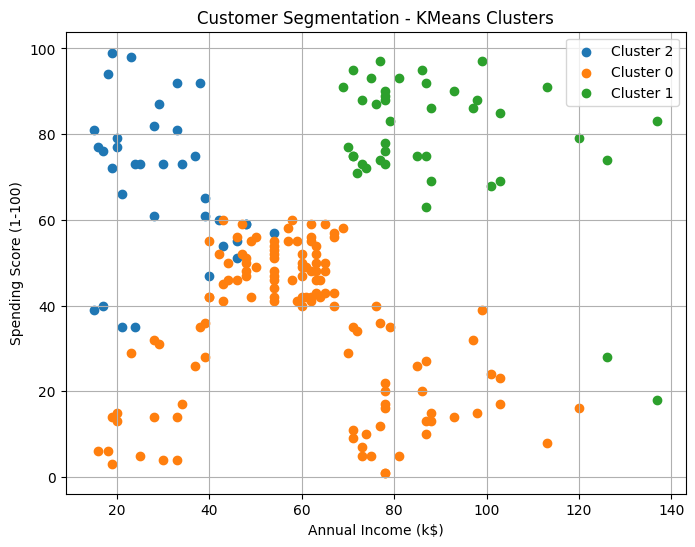

In [17]:
# Simple scatter plot
plt.figure(figsize=(8, 6))
for cluster in df['cluster'].unique():
    clustered = df[df['cluster'] == cluster]
    plt.scatter(clustered['Annual Income (k$)'], clustered['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation - KMeans Clusters')
plt.legend()
plt.grid(True)
plt.show()

# 6. Evaluate Kmeans

In [18]:
# Using silhouette score (measures how similar a point is to its own cluster compared to other clusters)
features = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

silhouette_avg = silhouette_score(features, df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.34


# 7. Save and Load trained Kmeans

In [19]:
import pickle

pickle.dump(kmeans,open("model.pkl",'wb'))